In [1]:
import numpy as np
from scipy.special import erf
from scipy.optimize import root_scalar
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
import math
from scipy.special import erf
plt.rcParams["figure.figsize"] = (10,8)

In [2]:
def lam(x):
    return np.sqrt(np.pi) * x * np.exp(x**2) * erf(x) - 1
lambd = fsolve(lam, 0.8)

h = 0.1
t0 = (h / (2 * lambd))**2  # Initial t0
t_end = 0.1 

# Check dt/(dx)^2 Convergence (New Sv0??)

In [19]:
t = np.linspace(t0, t_end+t0, 101)
h_a = 2*np.sqrt(t)*lambd

In [21]:
mew_eps128_Nx_128 = np.load('Mew2_N128_eps128.npz')['h_num']
mew_eps128_Nx_256 = np.load('Mew2_N256_eps128.npz')['h_num']
mew_eps128_Nx_512 = np.load('Mew2_N512_eps128.npz')['h_num']
mew_eps128_Nx_1024 = np.load('Mew2_N1024_eps128.npz')['h_num']

In [23]:
L2_mew_Nx_128 = np.linalg.norm(h_a.flatten() - mew_eps128_Nx_128)
L2_mew_Nx_256 = np.linalg.norm(h_a.flatten() - mew_eps128_Nx_256)
L2_mew_Nx_512 = np.linalg.norm(h_a.flatten() - mew_eps128_Nx_512)
L2_mew_Nx_1024 = np.linalg.norm(h_a.flatten() - mew_eps128_Nx_1024)
L2_mew_Nx_1024

0.0018606083185129362

<Figure size 800x600 with 0 Axes>

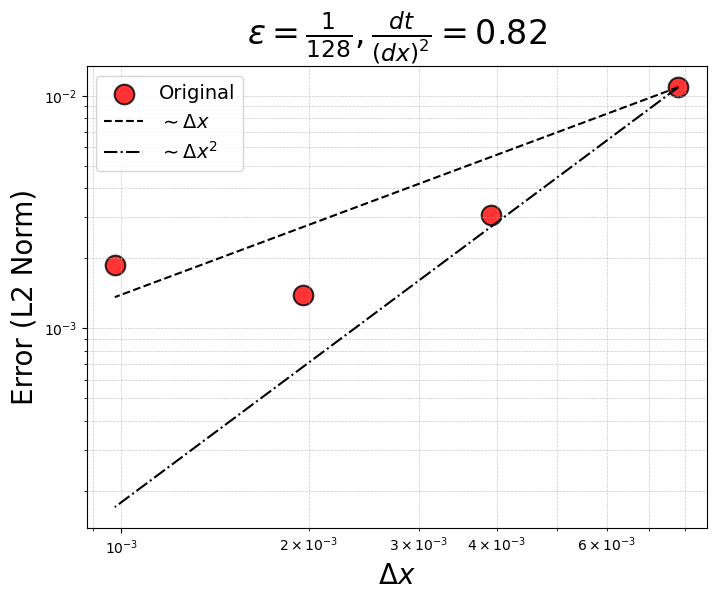

In [25]:
plt.figure(figsize=(8, 6))

L2_mew = [L2_mew_Nx_128, L2_mew_Nx_256, L2_mew_Nx_512,  L2_mew_Nx_1024]

xvalues = np.array([(1/128), (1/256),  (1/512), (1/1024)])
plt.figure(figsize=(8, 6))
plt.scatter(xvalues[:], L2_mew[:], s=200, color='red', label = 'Original', edgecolors='black', linewidth=1.5, alpha=0.8)
plt.loglog()
plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

plt.title(r'$\epsilon = \frac{1}{128}, \frac{dt}{(dx)^2} = 0.82 $', fontsize=24)
plt.xlabel(r'$\Delta x$', fontsize=20)
plt.ylabel('Error (L2 Norm)', fontsize = 20)

C1 = L2_mew[0] / xvalues[0]  # Scaling factor for ∼ ε
C2 = L2_mew[0] / (xvalues[0]**2)  # Scaling factor for ∼ ε²

eps_1 = C1 * xvalues    # ∼ ε reference line
eps_2 = C2 * xvalues**2  # ∼ ε² reference line

# Plot reference lines
plt.loglog(xvalues, eps_1, 'k--', label=r'$\sim \Delta x$')   # First-order convergence
plt.loglog(xvalues, eps_2, 'k-.', label=r'$\sim \Delta x^2$') # Second-order convergence

plt.legend(fontsize=14)

# eps = (1/64) (Not This)

In [28]:
mew_eps64_Nx_64 = np.load('mew_N64_eps64.npz')['h_num']
mew_eps64_Nx_128 = np.load('mew_N128_eps64.npz')['h_num']
mew_eps64_Nx_256 = np.load('mew_N256_eps64.npz')['h_num']
mew_eps64_Nx_512 = np.load('mew_N512_eps64.npz')['h_num']
mew_eps64_Nx_1024 = np.load('mew_N1024_eps64.npz')['h_num']

In [30]:
L2_mew_64_Nx_64 = np.linalg.norm(h_a.flatten() - mew_eps64_Nx_64)
L2_mew_64_Nx_128 = np.linalg.norm(h_a.flatten() - mew_eps64_Nx_128)
L2_mew_64_Nx_256 = np.linalg.norm(h_a.flatten() - mew_eps64_Nx_256)
L2_mew_64_Nx_512 = np.linalg.norm(h_a.flatten() - mew_eps64_Nx_512)
L2_mew_64_Nx_1024 = np.linalg.norm(h_a.flatten() - mew_eps64_Nx_1024)

<Figure size 800x600 with 0 Axes>

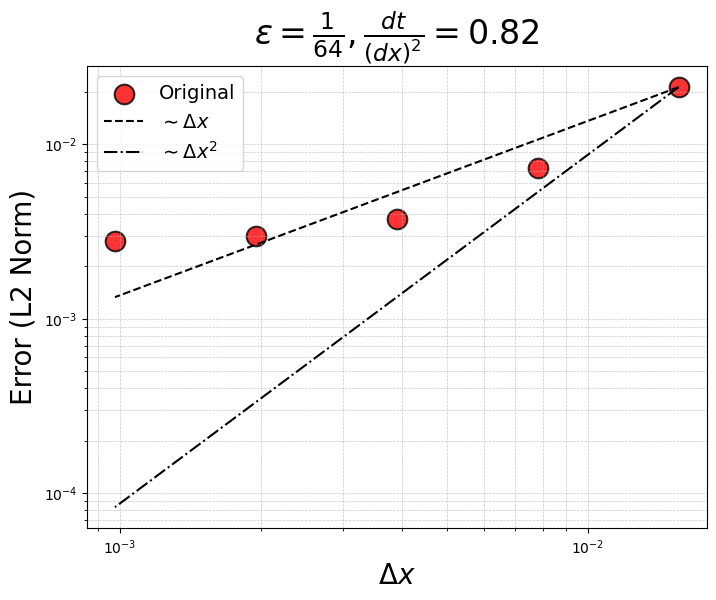

In [32]:
plt.figure(figsize=(8, 6))

L2_mew_eps64 = [L2_mew_64_Nx_64, L2_mew_64_Nx_128, L2_mew_64_Nx_256,  L2_mew_64_Nx_512, L2_mew_64_Nx_1024]

xvalues = np.array([(1/64), (1/128), (1/256),  (1/512), (1/1024)])
plt.figure(figsize=(8, 6))
plt.scatter(xvalues[:], L2_mew_eps64[:], s=200, color='red', label = 'Original', edgecolors='black', linewidth=1.5, alpha=0.8)
plt.loglog()
plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

plt.title(r'$\epsilon = \frac{1}{64}, \frac{dt}{(dx)^2} = 0.82 $', fontsize=24)
plt.xlabel(r'$\Delta x$', fontsize=20)
plt.ylabel('Error (L2 Norm)', fontsize = 20)

C1 = L2_mew_eps64[0] / xvalues[0]  # Scaling factor for ∼ ε
C2 = L2_mew_eps64[0] / (xvalues[0]**2)  # Scaling factor for ∼ ε²

eps_1 = C1 * xvalues    # ∼ ε reference line
eps_2 = C2 * xvalues**2  # ∼ ε² reference line

# Plot reference lines
plt.loglog(xvalues, eps_1, 'k--', label=r'$\sim \Delta x$')   # First-order convergence
plt.loglog(xvalues, eps_2, 'k-.', label=r'$\sim \Delta x^2$') # Second-order convergence

plt.legend(fontsize=14)

# Graph 1 (Asmytotic Updates)

In [35]:
# Read in Asmytotic data 
Asy_h_eps128_Nx_128 = np.load('Asy_N128_dt2e-5_eps128.npz')['h_num']
Asy_h_eps128_Nx_256 = np.load('Asy_N256_dt2e-5_eps128.npz')['h_num']
Asy_h_eps128_Nx_512 = np.load('Asy_N512_dt2e-5_eps128.npz')['h_num']
Asy_h_eps128_Nx_1028 = np.load('Asy_N1028_dt2e-5_eps128.npz')['h_num']

In [37]:
h_eps128_Nx_128 = np.load('N128_dt2e-5_eps128.npz')['h_num']
h_eps128_Nx_256 = np.load('N256_dt2e-5_eps128.npz')['h_num']
h_eps128_Nx_512 = np.load('N512_dt2e-5_eps128.npz')['h_num']
h_eps128_Nx_1024 = np.load('N1028_dt2e-5_eps128.npz')['h_num']

h_eps128_Nx_181 = np.load('N181_dt2e-5_eps128.npz')['h_num']
h_eps128_Nx_362 = np.load('N362_dt2e-5_eps128.npz')['h_num']

h_eps128_Nx_152 = np.load('N152_dt2e-5_eps128.npz')['h_num']
h_eps128_Nx_215 = np.load('N215_dt2e-5_eps128.npz')['h_num']
h_eps128_Nx_304 = np.load('N304_dt2e-5_eps128.npz')['h_num']
h_eps128_Nx_430 = np.load('N430_dt2e-5_eps128.npz')['h_num']

In [39]:
t = np.linspace(t0, t_end+t0, len(h_eps128_Nx_128))
h_a = 2*np.sqrt(t)*lambd

In [41]:
Asy_L2_eps128_Nx_128 = np.linalg.norm(h_a.flatten() - Asy_h_eps128_Nx_128)
Asy_L2_eps128_Nx_256 = np.linalg.norm(h_a.flatten() - Asy_h_eps128_Nx_256)
Asy_L2_eps128_Nx_512 = np.linalg.norm(h_a.flatten() - Asy_h_eps128_Nx_512)
Asy_L2_eps128_Nx_1028 = np.linalg.norm(h_a.flatten() - Asy_h_eps128_Nx_1028)

In [43]:
L2_eps128_Nx_128 = np.linalg.norm(h_a.flatten() - h_eps128_Nx_128)
L2_eps128_Nx_256 = np.linalg.norm(h_a.flatten() - h_eps128_Nx_256)
L2_eps128_Nx_512 = np.linalg.norm(h_a.flatten() - h_eps128_Nx_512)
L2_eps128_Nx_1024 = np.linalg.norm(h_a.flatten() - h_eps128_Nx_1024)

[0.009357617862422537, 0.006172559891330393, 0.005469393738879674, 0.005292144494787016]


<Figure size 800x600 with 0 Axes>

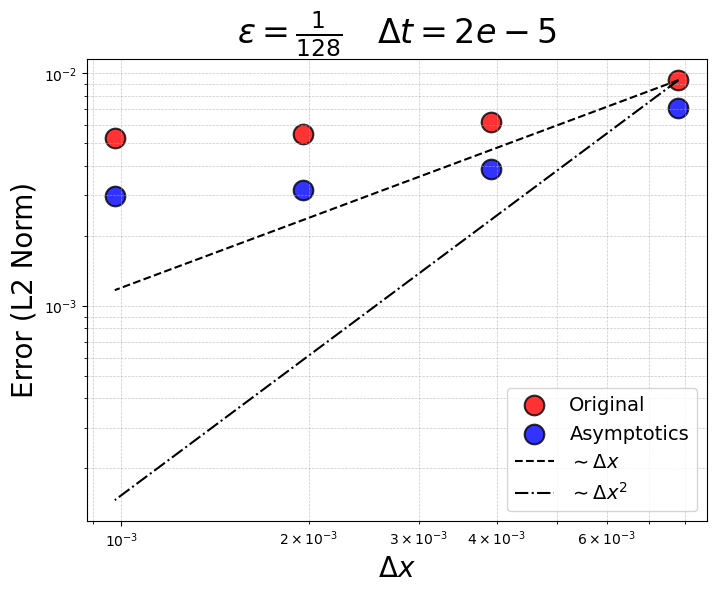

In [45]:
plt.figure(figsize=(8, 6))


L2_eps_0_45 = [L2_eps128_Nx_128, L2_eps128_Nx_256, L2_eps128_Nx_512,  L2_eps128_Nx_1024]
Asy_L2_eps_128 = [Asy_L2_eps128_Nx_128, Asy_L2_eps128_Nx_256, Asy_L2_eps128_Nx_512,  Asy_L2_eps128_Nx_1028]

xvalues = np.array([(1/128), (1/256),  (1/512), (1/1024)])
plt.figure(figsize=(8, 6))
plt.scatter(xvalues[:], L2_eps_0_45[:], s=200, color='red', label = 'Original', edgecolors='black', linewidth=1.5, alpha=0.8)
plt.scatter(xvalues[:], Asy_L2_eps_128[:], s=200, color='blue', label = 'Asymptotics' , edgecolors='black', linewidth=1.5, alpha=0.8)
plt.loglog()
plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

plt.title(r'$\epsilon = \frac{1}{128} \quad \Delta t = 2e-5$', fontsize=24)
plt.xlabel(r'$\Delta x$', fontsize=20)
plt.ylabel('Error (L2 Norm)', fontsize = 20)

C1 = L2_eps_0_45[0] / xvalues[0]  # Scaling factor for ∼ ε
C2 = L2_eps_0_45[0] / (xvalues[0]**2)  # Scaling factor for ∼ ε²

eps_1 = C1 * xvalues    # ∼ ε reference line
eps_2 = C2 * xvalues**2  # ∼ ε² reference line

# Plot reference lines
plt.loglog(xvalues, eps_1, 'k--', label=r'$\sim \Delta x$')   # First-order convergence
plt.loglog(xvalues, eps_2, 'k-.', label=r'$\sim \Delta x^2$') # Second-order convergence

plt.legend(fontsize=14)

#plt.savefig("Result1.svg", format="svg", dpi=300)

print(L2_eps_0_45)

# Low Resolutionn Vs High Resolution

In [48]:
h_HD = h_eps128_Nx_1024 

L2_norm_Nx_128 = np.linalg.norm(h_HD - h_eps128_Nx_128 )
L2_norm_Nx_256 = np.linalg.norm(h_HD - h_eps128_Nx_256)
L2_norm_Nx_512 = np.linalg.norm(h_HD - h_eps128_Nx_512)

L2_norm_Nx_181 = np.linalg.norm(h_HD - h_eps128_Nx_181)
L2_norm_Nx_362 = np.linalg.norm(h_HD - h_eps128_Nx_362)

L2_norm_Nx_152 = np.linalg.norm(h_HD - h_eps128_Nx_152)
L2_norm_Nx_215 = np.linalg.norm(h_HD - h_eps128_Nx_215)
L2_norm_Nx_304 = np.linalg.norm(h_HD - h_eps128_Nx_304)
L2_norm_Nx_430 = np.linalg.norm(h_HD - h_eps128_Nx_430)

L2_eps128_Nx_128 = np.linalg.norm(h_a.flatten() - h_eps128_Nx_128)
L2_eps128_Nx_256 = np.linalg.norm(h_a.flatten() - h_eps128_Nx_256)
L2_eps128_Nx_512 = np.linalg.norm(h_a.flatten() - h_eps128_Nx_512)
L2_eps128_Nx_181 = np.linalg.norm(h_a.flatten() - h_eps128_Nx_181)
L2_eps128_Nx_362 = np.linalg.norm(h_a.flatten() - h_eps128_Nx_362)

L2_eps128_Nx_152 = np.linalg.norm(h_a.flatten() - h_eps128_Nx_152)
L2_eps128_Nx_215 = np.linalg.norm(h_a.flatten() - h_eps128_Nx_215)
L2_eps128_Nx_304 = np.linalg.norm(h_a.flatten() - h_eps128_Nx_304)
L2_eps128_Nx_430 = np.linalg.norm(h_a.flatten() - h_eps128_Nx_430)

<Figure size 800x600 with 0 Axes>

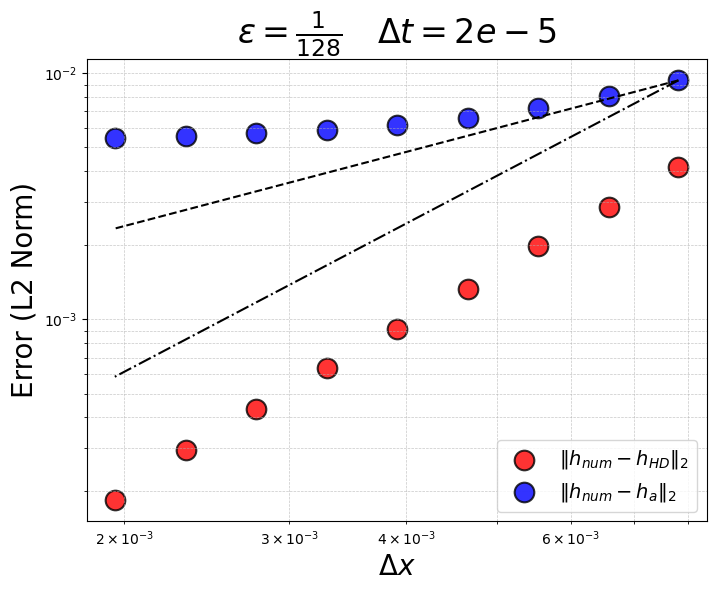

In [50]:
plt.figure(figsize=(8, 6))

L2_norm = [L2_norm_Nx_128, L2_norm_Nx_152, L2_norm_Nx_181, L2_norm_Nx_215, L2_norm_Nx_256, L2_norm_Nx_304, L2_norm_Nx_362,L2_norm_Nx_430, L2_norm_Nx_512]
L2_eps_0_45 = [L2_eps128_Nx_128, L2_eps128_Nx_152, L2_eps128_Nx_181, L2_eps128_Nx_215, L2_eps128_Nx_256, L2_eps128_Nx_304, L2_eps128_Nx_362, L2_eps128_Nx_430, L2_eps128_Nx_512]


xvalues = np.array([(1/128), (1/152), (1/181), (1/215), (1/256), (1/304), (1/362), (1/430), (1/512)])
plt.figure(figsize=(8, 6))
plt.scatter(xvalues[:], L2_norm[:], s=200, color='red', label=r'$\| h_{num} - h_{HD} \|_2$', edgecolors='black', linewidth=1.5, alpha=0.8)

plt.scatter(xvalues[:], L2_eps_0_45[:], s=200, color='blue', label = r'$\| h_{num} - h_a \|_2$', edgecolors='black', linewidth=1.5, alpha=0.8)
plt.loglog()

plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

plt.title(r'$\epsilon = \frac{1}{128} \quad \Delta t = 2e-5$', fontsize=24)
plt.xlabel(r'$\Delta x$', fontsize=20)
plt.ylabel('Error (L2 Norm)', fontsize = 20)

C1 = L2_norm[0] / xvalues[0]  # Scaling factor for ∼ ε
C2 = L2_norm[0] / (xvalues[0]**2)  # Scaling factor for ∼ ε²
eps_1 = C1 * xvalues    # ∼ ε reference line
eps_2 = C2 * xvalues**2  # ∼ ε² reference line
#plt.loglog(xvalues, eps_1, 'k--', label=r'$\mathcal{O}(\Delta x )$')   # First-order convergence
#plt.loglog(xvalues, eps_2, 'k-.', label=r'$\mathcal{O}(\Delta x ^2)$') # Second-order convergence

C3 = L2_eps_0_45[0] / xvalues[0]  # Scaling factor for ∼ ε
C4 = L2_eps_0_45[0] / (xvalues[0]**2)  # Scaling factor for ∼ ε²
eps_3 = C3 * xvalues    # ∼ ε reference line
eps_4 = C4 * xvalues**2  # ∼ ε² reference line
plt.loglog(xvalues, eps_3, 'k--')   # First-order convergence
plt.loglog(xvalues, eps_4, 'k-.') # Second-order convergence

# Add legend
plt.legend(fontsize=14)

# Show plot
#plt.show()

#plt.savefig("Result1.svg", format="svg", dpi=300)

# Model Error vs Numerical Error

In [53]:
h_eps128_Nx_128 = np.load('N128_dt2e-5_eps128.npz')['h_num']
h_eps128_Nx_256 = np.load('N256_dt2e-5_eps128.npz')['h_num']
h_eps128_Nx_512 = np.load('N512_dt2e-5_eps128.npz')['h_num']
h_eps128_Nx_1024 = np.load('N1028_dt2e-5_eps128.npz')['h_num']

In [55]:
Error128 = np.abs(h_a.flatten() - h_eps128_Nx_128)
Error256 = np.abs(h_a.flatten() - h_eps128_Nx_256)
Error512 = np.abs(h_a.flatten() - h_eps128_Nx_512)
Error1028 = np.abs(h_a.flatten() - h_eps128_Nx_1024)

<>:11: SyntaxWarning: invalid escape sequence '\D'
<>:11: SyntaxWarning: invalid escape sequence '\D'
/var/folders/9h/nmgxk6252393vjm65h0cjxxr0000gn/T/ipykernel_77355/1716684749.py:11: SyntaxWarning: invalid escape sequence '\D'
  plt.title("Error Over Time For Diffreent $\Delta x$ Values", fontsize=24)


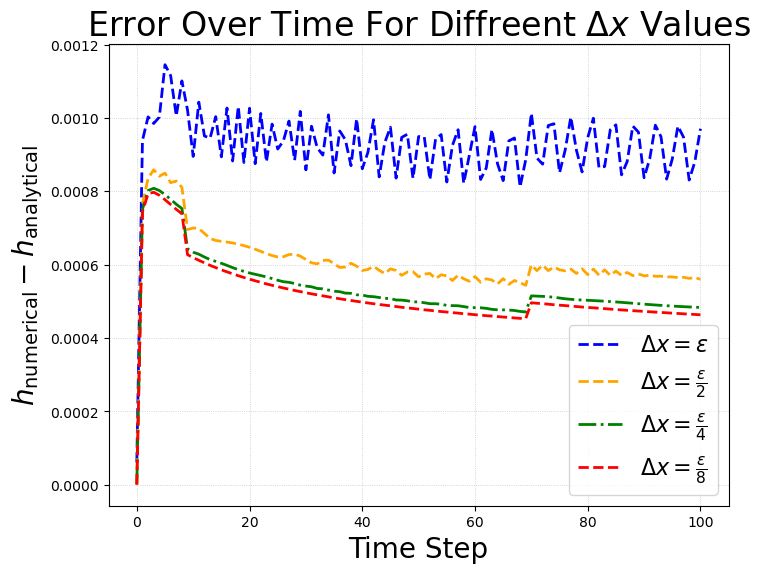

In [57]:
plt.figure(figsize=(8, 6))

plt.plot(Error128, 'b--', linewidth=2, label=r'$\Delta x = \epsilon $')
plt.plot(Error256, 'orange', linestyle='--', linewidth=2, label=r'$\Delta x = \frac{\epsilon}{2}$')
plt.plot(Error512, 'g-.', linewidth=2, label=r'$\Delta x = \frac{\epsilon}{4}$')
plt.plot(Error1028, 'r--', linewidth=2, label=r'$\Delta x = \frac{\epsilon}{8}$')

# Labels and Title
plt.xlabel("Time Step", fontsize=20)
plt.ylabel(r"$h_{\text{numerical}} - h_{\text{analytical}}$", fontsize=20)
plt.title("Error Over Time For Diffreent $\Delta x$ Values", fontsize=24)

# Grid and Legend
plt.grid(True, linestyle=":", linewidth=0.6, alpha=0.7)
plt.legend(fontsize=16)


# Show plot
#plt.show()

#plt.savefig("Result3.svg", format="svg", dpi=300)

# Temperature

In [60]:
T_eps128_Nx_128 = np.load('N128_dt2e-5_eps128.npz')['T']
T_eps128_Nx_128.shape[0]

129

In [102]:
T_a = np.zeros([(T_eps128_Nx_128.shape[0]),(T_eps128_Nx_128.shape[1])])
i=0
while i<len(h_a): 
    h_now = h_a[i]
    mask = x < h_now
    T_a[mask,i] = 1.0 - erf(lambd*x[mask]/h_now)/erf(lambd)
    i = i+1

In [104]:
# Get analytical soln
Nx = 128 + 1
Lx = 1.0
x = np.linspace(0, Lx, Nx)
t = np.linspace(t0, t_end+t0, T_eps128_Nx_128.shape[1])

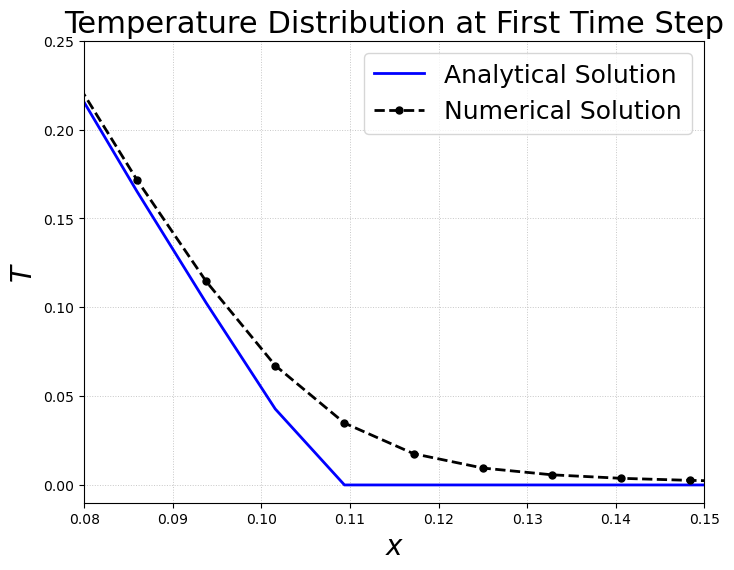

In [106]:
# Create figure
plt.figure(figsize=(8, 6))

# Plot Analytical Solution
plt.plot(x, T_a[:, 1], 'b-', linewidth=2, label="Analytical Solution")

# Plot Numerical Solution
plt.plot(x, T_eps128_Nx_128[:, 1], 'k--', linewidth=2, marker='o', markersize=5, label="Numerical Solution")

# Title and Labels
plt.title(r"Temperature Distribution at First Time Step", fontsize=22)
plt.xlabel("$x$", fontsize=20)
plt.ylabel("$T$", fontsize=20)

# Set axis limits for better visibility
plt.xlim(0.08, 0.15)
plt.ylim(-0.01, 0.25)

# Improve grid visibility
plt.grid(True, linestyle=":", linewidth=0.7, alpha=0.7)

# Add legend
plt.legend(fontsize=18, loc="best")

# Show the plot
#plt.show()

#plt.savefig("Zoomed_in_temperature.png", format="png")


# Keep dx constant vary eps

In [110]:
h_eps512_Nx_512 = np.load('N512_dt3e-5_eps512.npz')['h_num']
h_eps256_Nx_512 = np.load('N512_dt3e-5_eps256.npz')['h_num']
h_eps128_Nx_512 = np.load('N512_dt3e-5_eps128.npz')['h_num']

In [112]:
L2_eps512_Nx_512 = np.linalg.norm(h_a.flatten() - h_eps512_Nx_512)
L2_eps256_Nx_512 = np.linalg.norm(h_a.flatten() - h_eps256_Nx_512)
L2_eps128_Nx_512 = np.linalg.norm(h_a.flatten() - h_eps128_Nx_512)

<Figure size 800x600 with 0 Axes>

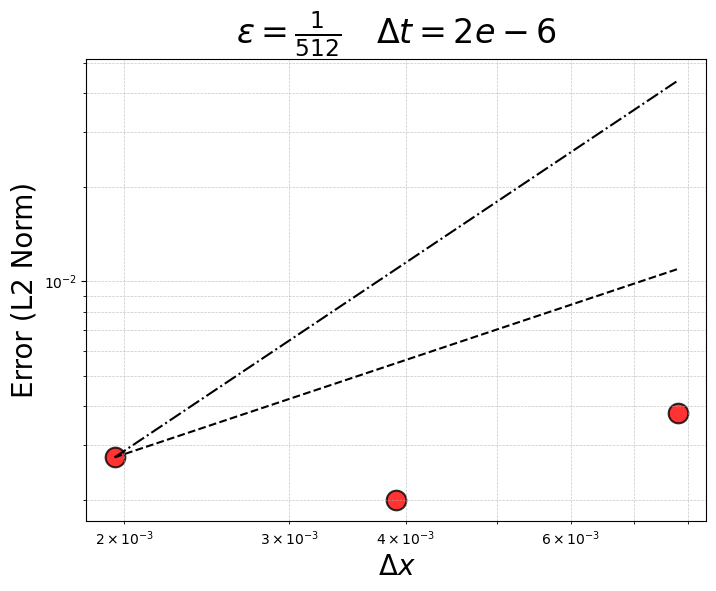

In [114]:
plt.figure(figsize=(8, 6))


L2_eps = np.array([L2_eps512_Nx_512, L2_eps256_Nx_512, L2_eps128_Nx_512])

evalues = np.array([(1/512), (1/256),  (1/128)])
plt.figure(figsize=(8, 6))
plt.scatter(evalues[:], L2_eps[:], s=200, color='red', edgecolors='black', linewidth=1.5, alpha=0.8)
plt.loglog()
plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

plt.title(r'$\epsilon = \frac{1}{512} \quad \Delta t = 2e-6$', fontsize=24)
plt.xlabel(r'$\Delta x$', fontsize=20)
plt.ylabel('Error (L2 Norm)', fontsize = 20)

C1 = L2_eps[0] / evalues[0]  # Scaling factor for ∼ ε
C2 = L2_eps[0] / (evalues[0]**2)  # Scaling factor for ∼ ε²

eps_1 = C1 * evalues    # ∼ ε reference line
eps_2 = C2 * evalues**2  # ∼ ε² reference line

# Plot reference lines
plt.loglog(evalues, eps_1, 'k--', label=r'$\sim \Delta x$')   # First-order convergence
plt.loglog(evalues, eps_2, 'k-.', label=r'$\sim \Delta x^2$') # Second-order convergence

#lt.savefig("Result1.svg", format="svg", dpi=300)



# For Thesis !!!!!!!!!!!!!!!!!!!

In [117]:
dtC_eps128_Nx_1024 = np.load('N1024_dtchange_eps128.npz')['h_num']
dtC_eps128_Nx_128 = np.load('N128_dtchange_eps128.npz')['h_num']
dtC_eps128_Nx_256 = np.load('N256_dtchange_eps128.npz')['h_num']
dtC_eps128_Nx_512 = np.load('N512_dtchange_eps128.npz')['h_num']

dtC_eps128_Nx_152 = np.load('N152_dtchange_eps128.npz')['h_num']
dtC_eps128_Nx_181 = np.load('N181_dtchange_eps128.npz')['h_num']
dtC_eps128_Nx_215 = np.load('N215_dtchange_eps128.npz')['h_num']
dtC_eps128_Nx_304 = np.load('N304_dtchange_eps128.npz')['h_num']
dtC_eps128_Nx_362 = np.load('N362_dtchange_eps128.npz')['h_num']
dtC_eps128_Nx_431 = np.load('N431_dtchange_eps128.npz')['h_num']
dtC_eps128_Nx_608 = np.load('N608_dtchange_eps128.npz')['h_num']
dtC_eps128_Nx_724 = np.load('N724_dtchange_eps128.npz')['h_num']
dtC_eps128_Nx_861 = np.load('N861_dtchange_eps128.npz')['h_num']

dtC_HD = np.load('N1448_dtchange_eps128.npz')['h_num']

In [119]:
L2_eps128_Nx_128 = np.linalg.norm(h_a.flatten() - dtC_eps128_Nx_128)
L2_eps128_Nx_256 = np.linalg.norm(h_a.flatten() - dtC_eps128_Nx_256)
L2_eps128_Nx_512 = np.linalg.norm(h_a.flatten() - dtC_eps128_Nx_512)
L2_eps128_Nx_1024 = np.linalg.norm(h_a.flatten() - dtC_eps128_Nx_1024)

L2_eps128_Nx_181 = np.linalg.norm(h_a.flatten() - dtC_eps128_Nx_181)
L2_eps128_Nx_362 = np.linalg.norm(h_a.flatten() - dtC_eps128_Nx_362)
L2_eps128_Nx_724 = np.linalg.norm(h_a.flatten() - dtC_eps128_Nx_724)

L2_eps128_Nx_152 = np.linalg.norm(h_a.flatten() - dtC_eps128_Nx_152)
L2_eps128_Nx_215 = np.linalg.norm(h_a.flatten() - dtC_eps128_Nx_215)
L2_eps128_Nx_304 = np.linalg.norm(h_a.flatten() - dtC_eps128_Nx_304)
L2_eps128_Nx_431 = np.linalg.norm(h_a.flatten() - dtC_eps128_Nx_431)
L2_eps128_Nx_608 = np.linalg.norm(h_a.flatten() - dtC_eps128_Nx_608)
L2_eps128_Nx_861 = np.linalg.norm(h_a.flatten() - dtC_eps128_Nx_861)

In [121]:
L2_HD_Nx_128 = np.linalg.norm(dtC_HD - dtC_eps128_Nx_128 )
L2_HD_Nx_256 = np.linalg.norm(dtC_HD - dtC_eps128_Nx_256)
L2_HD_Nx_512 = np.linalg.norm(dtC_HD - dtC_eps128_Nx_512)
#L2_HD_Nx_1024 = np.linalg.norm(dtC_HD - dtC_eps128_Nx_1024)

L2_HD_Nx_181 = np.linalg.norm(dtC_HD - dtC_eps128_Nx_181)
L2_HD_Nx_362 = np.linalg.norm(dtC_HD - dtC_eps128_Nx_362)
L2_HD_Nx_724 = np.linalg.norm(dtC_HD - dtC_eps128_Nx_724)

L2_HD_Nx_152 = np.linalg.norm(dtC_HD - dtC_eps128_Nx_152)
L2_HD_Nx_215 = np.linalg.norm(dtC_HD - dtC_eps128_Nx_215)
L2_HD_Nx_304 = np.linalg.norm(dtC_HD - dtC_eps128_Nx_304)
L2_HD_Nx_431 = np.linalg.norm(dtC_HD - dtC_eps128_Nx_431)
L2_HD_Nx_608 = np.linalg.norm(dtC_HD - dtC_eps128_Nx_608)
#L2_HD_Nx_861 = np.linalg.norm(dtC_HD - dtC_eps128_Nx_861)

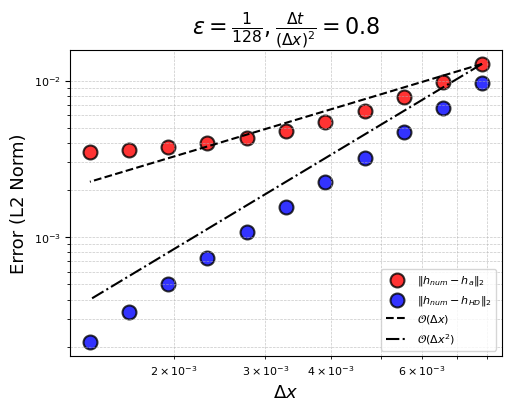

In [123]:
plt.figure(figsize=(5, 4), layout='constrained')

L2_dtC = [L2_eps128_Nx_128, L2_eps128_Nx_152, L2_eps128_Nx_181, L2_eps128_Nx_215, L2_eps128_Nx_256, L2_eps128_Nx_304, L2_eps128_Nx_362, \
          L2_eps128_Nx_431, L2_eps128_Nx_512, L2_eps128_Nx_608, L2_eps128_Nx_724]


L2_HD = [L2_HD_Nx_128, L2_HD_Nx_152, L2_HD_Nx_181, L2_HD_Nx_215, L2_HD_Nx_256, L2_HD_Nx_304, L2_HD_Nx_362,  \
         L2_HD_Nx_431, L2_HD_Nx_512, L2_HD_Nx_608, L2_HD_Nx_724]

xvalues = np.array([(1/128), (1/152), (1/181), (1/215), (1/256), (1/304), (1/362), (1/432), (1/512), (1/608), (1/724)])
plt.scatter(xvalues[:], L2_dtC[:], s=100, color='red',  label=r'$\| h_{num} - h_{a} \|_2$', edgecolors='black', linewidth=1.5, alpha=0.8)
plt.scatter(xvalues[:], L2_HD[:], s=100, color='blue',  label=r'$\| h_{num} - h_{HD} \|_2$', edgecolors='black', linewidth=1.5, alpha=0.8)
plt.loglog()
plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

plt.title(r'$\epsilon = \frac{1}{128}, \frac{\Delta t}{(\Delta x)^2} = 0.8 $', fontsize=16)
plt.xlabel(r'$\Delta x$', fontsize=13)
plt.ylabel('Error (L2 Norm)', fontsize = 13)

C1 = L2_dtC[0] / xvalues[0]  # Scaling factor for ∼ ε
C2 = L2_dtC[0] / (xvalues[0]**2)  # Scaling factor for ∼ ε²

eps_1 = C1 * xvalues    # ∼ ε reference line
eps_2 = C2 * xvalues**2  # ∼ ε² reference line

# Plot reference lines
plt.loglog(xvalues, eps_1, 'k--', label=r'$\mathcal{O}(\Delta x)$')   # First-order convergence
plt.loglog(xvalues, eps_2, 'k-.', label=r'$\mathcal{O}(\Delta x^2)$') # Second-order convergence

plt.tick_params(axis='both', which='major', labelsize=8)
plt.tick_params(axis='both', which='minor', labelsize=8)

# Add legend
plt.legend(fontsize=8, loc='lower right')

#plt.savefig("Convergence_Varydx.png", format="png")
#plt.savefig("Convergence_Varydx.pdf", format="pdf")

# Error Jump Graph

In [126]:
Error128 = np.abs(h_a.flatten() - dtC_eps128_Nx_128)
Error256 = np.abs(h_a.flatten() - dtC_eps128_Nx_256)
Error512 = np.abs(h_a.flatten() - dtC_eps128_Nx_512)
Error1028 = np.abs(h_a.flatten() - dtC_eps128_Nx_1024)

<>:11: SyntaxWarning: invalid escape sequence '\D'
<>:11: SyntaxWarning: invalid escape sequence '\D'
/var/folders/9h/nmgxk6252393vjm65h0cjxxr0000gn/T/ipykernel_77355/3194990129.py:11: SyntaxWarning: invalid escape sequence '\D'
  plt.title("Error Over Time For Different $\Delta x$ Values", fontsize=14)


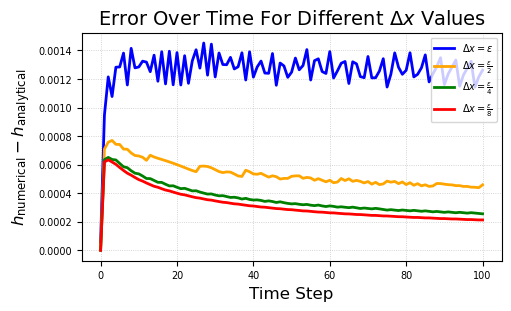

In [128]:
plt.figure(figsize=(5, 3), layout='constrained')

plt.plot(Error128, 'blue', linewidth=2, label=r'$\Delta x = \epsilon $')
plt.plot(Error256, 'orange', linewidth=2, label=r'$\Delta x = \frac{\epsilon}{2}$')
plt.plot(Error512, 'green', linewidth=2, label=r'$\Delta x = \frac{\epsilon}{4}$')
plt.plot(Error1028, 'red', linewidth=2, label=r'$\Delta x = \frac{\epsilon}{8}$')

# Labels and Title
plt.xlabel("Time Step", fontsize=12)
plt.ylabel(r"$h_{\text{numerical}} - h_{\text{analytical}}$", fontsize=12)
plt.title("Error Over Time For Different $\Delta x$ Values", fontsize=14)

# Grid and Legend
plt.grid(True, linestyle=":", linewidth=0.6, alpha=0.7)
plt.legend(fontsize=7, loc='upper right')

plt.tick_params(axis='both', which='major', labelsize=7)
plt.tick_params(axis='both', which='minor', labelsize=7)


# Show plot
#plt.show()

#plt.savefig("Error_Over_time.png", format="png")
#plt.savefig("Error_Over_time.pdf", format="pdf")

# Vary eps

In [131]:
eps2dx_Nx_128 = np.load('N128_eps2dx.npz')['h_num']
eps2dx_Nx_256 = np.load('N256_eps2dx.npz')['h_num']
eps2dx_Nx_512 = np.load('N512_eps2dx.npz')['h_num']
eps2dx_Nx_1024 = np.load('N1024_eps2dx.npz')['h_num']

In [133]:
L2_eps2dx_Nx_128 = np.linalg.norm(h_a.flatten() - eps2dx_Nx_128)
L2_eps2dx_Nx_256 = np.linalg.norm(h_a.flatten() - eps2dx_Nx_256)
L2_eps2dx_Nx_512 = np.linalg.norm(h_a.flatten() - eps2dx_Nx_512)
L2_eps2dx_Nx_1024 = np.linalg.norm(h_a.flatten() - eps2dx_Nx_1024)

<Figure size 800x600 with 0 Axes>

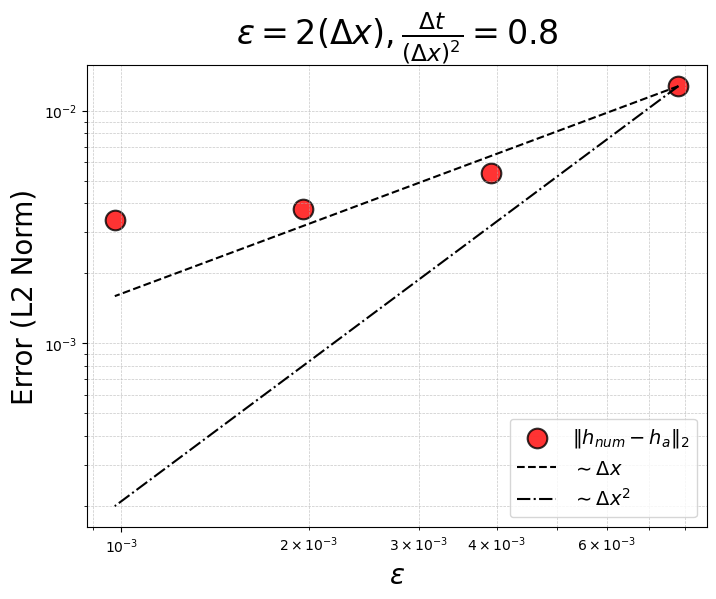

In [135]:
plt.figure(figsize=(8, 6))

L2_eps2dx = [L2_eps128_Nx_128,  L2_eps128_Nx_256,   L2_eps128_Nx_512, L2_eps128_Nx_1024]

xvalues = np.array([(1/128),  (1/256),  (1/512), (1/1024)])
plt.figure(figsize=(8, 6))
plt.scatter(xvalues[:], L2_eps2dx[:], s=200, color='red',  label=r'$\| h_{num} - h_{a} \|_2$', edgecolors='black', linewidth=1.5, alpha=0.8)
plt.loglog()
plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

plt.title(r'$\epsilon = 2(\Delta x), \frac{\Delta t}{(\Delta x)^2} = 0.8 $', fontsize=24)
plt.xlabel(r'$\epsilon $', fontsize=20)
plt.ylabel('Error (L2 Norm)', fontsize = 20)

C1 = L2_dtC[0] / xvalues[0]  # Scaling factor for ∼ ε
C2 = L2_dtC[0] / (xvalues[0]**2)  # Scaling factor for ∼ ε²

eps_1 = C1 * xvalues    # ∼ ε reference line
eps_2 = C2 * xvalues**2  # ∼ ε² reference line

# Plot reference lines
plt.loglog(xvalues, eps_1, 'k--', label=r'$\sim \Delta x$')   # First-order convergence
plt.loglog(xvalues, eps_2, 'k-.', label=r'$\sim \Delta x^2$') # Second-order convergence

# Add legend
plt.legend(fontsize=14, loc='lower right')

#plt.savefig("Convergence_Varyepsilon.png", format="png")

# Temperature Zoomed in

In [138]:
T_eps128_Nx_128 = np.load('N128_dtchange_eps128.npz')['T']
T_eps128_Nx_128.shape[0]

129

In [140]:
# Get analytical soln
Nx = 128 + 1
Lx = 1.0
x = np.linspace(0, Lx, Nx)
t = np.linspace(t0, t_end+t0, T_eps128_Nx_128.shape[1])

In [142]:
T_a = np.zeros([(T_eps128_Nx_128.shape[0]),(T_eps128_Nx_128.shape[1])])
i=0
while i<len(h_a): 
    h_now = h_a[i]
    mask = x < h_now
    T_a[mask,i] = 1.0 - erf(lambd*x[mask]/h_now)/erf(lambd)
    i = i+1

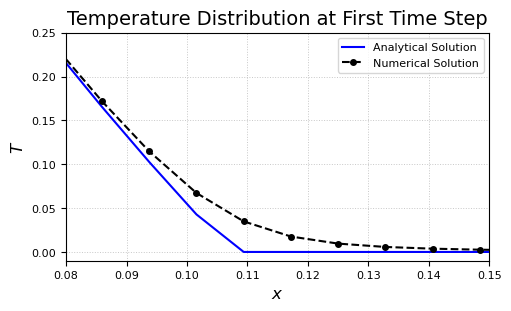

In [144]:
# Create figure
plt.figure(figsize=(5, 3), layout='constrained')

# Plot Analytical Solution
plt.plot(x, T_a[:, 1], 'b-', linewidth=1.5, label="Analytical Solution")

# Plot Numerical Solution
plt.plot(x, T_eps128_Nx_128[:, 1], 'k--', linewidth=1.5, marker='o', markersize=4, label="Numerical Solution")

# Title and Labels
plt.title(r"Temperature Distribution at First Time Step", fontsize=14)
plt.xlabel("$x$", fontsize=12)
plt.ylabel("$T$", fontsize=12)

# Set axis limits for better visibility
plt.xlim(0.08, 0.15)
plt.ylim(-0.01, 0.25)

# Improve grid visibility
plt.grid(True, linestyle=":", linewidth=0.7, alpha=0.7)

# Add legend
plt.legend(fontsize=8, loc="best")

plt.tick_params(axis='both', which='major', labelsize=8)
plt.tick_params(axis='both', which='minor', labelsize=8)

# Show the plot
#plt.show()

#plt.savefig("Zoomed_in_temperature.png", format="png")
#plt.savefig("Zoomed_in_temperature.pdf", format="pdf")

# at step 10

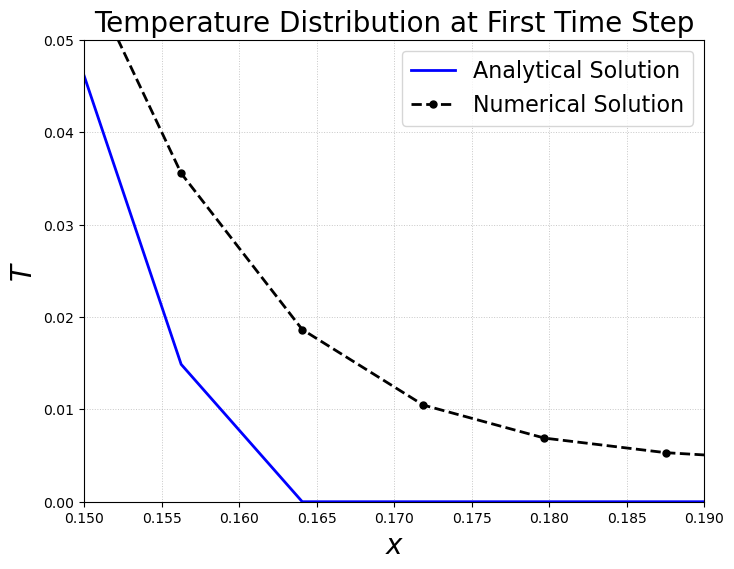

In [147]:
# Create figure
plt.figure(figsize=(8, 6))

# Plot Analytical Solution
plt.plot(x, T_a[:, 10], 'b-', linewidth=2, label="Analytical Solution")

# Plot Numerical Solution
plt.plot(x, T_eps128_Nx_128[:, 10], 'k--', linewidth=2, marker='o', markersize=5, label="Numerical Solution")

# Title and Labels
plt.title(r"Temperature Distribution at First Time Step", fontsize=20)
plt.xlabel("$x$", fontsize=20)
plt.ylabel("$T$", fontsize=20)

# Set axis limits for better visibility
plt.xlim(0.15, 0.19)
plt.ylim(0, 0.05)

# Improve grid visibility
plt.grid(True, linestyle=":", linewidth=0.7, alpha=0.7)

# Add legend
plt.legend(fontsize=16, loc="best")

# Show the plot
#plt.show()

#plt.savefig("Zoomed_in_temperature.png", format="png")

# Asymtotic Comparison

In [150]:
Asym_eps128_Nx_128 = np.load('Asymtotic_N128_eps128.npz')['h_num']
Asym_eps128_Nx_256 = np.load('Asymtotic_N256_eps128.npz')['h_num']
Asym_eps128_Nx_512 = np.load('Asymtotic_N512_eps128.npz')['h_num']
Asym_eps128_Nx_1024 = np.load('Asymtotic_N1024_eps128.npz')['h_num']

Asym_eps128_Nx_181 = np.load('Asymtotic_N181_eps128.npz')['h_num']
Asym_eps128_Nx_362 = np.load('Asymtotic_N362_eps128.npz')['h_num']
Asym_eps128_Nx_724 = np.load('Asymtotic_N724_eps128.npz')['h_num']

Asym_eps128_Nx_152 = np.load('Asymtotic_N152_eps128.npz')['h_num']
Asym_eps128_Nx_215 = np.load('Asymtotic_N215_eps128.npz')['h_num']
Asym_eps128_Nx_304 = np.load('Asymtotic_N304_eps128.npz')['h_num']
Asym_eps128_Nx_431 = np.load('Asymtotic_N431_eps128.npz')['h_num']
Asym_eps128_Nx_608 = np.load('Asymtotic_N608_eps128.npz')['h_num']
Asym_eps128_Nx_861 = np.load('Asymtotic_N861_eps128.npz')['h_num']

In [152]:
Asym_L2_eps128_Nx_128 = np.linalg.norm(h_a.flatten() - Asym_eps128_Nx_128)
Asym_L2_eps128_Nx_256 = np.linalg.norm(h_a.flatten() - Asym_eps128_Nx_256)
Asym_L2_eps128_Nx_512 = np.linalg.norm(h_a.flatten() - Asym_eps128_Nx_512)
Asym_L2_eps128_Nx_1024 = np.linalg.norm(h_a.flatten() - Asym_eps128_Nx_1024)

Asym_L2_eps128_Nx_181 = np.linalg.norm(h_a.flatten() - Asym_eps128_Nx_181)
Asym_L2_eps128_Nx_362 = np.linalg.norm(h_a.flatten() - Asym_eps128_Nx_362)
Asym_L2_eps128_Nx_724 = np.linalg.norm(h_a.flatten() - Asym_eps128_Nx_724)

Asym_L2_eps128_Nx_152 = np.linalg.norm(h_a.flatten() - Asym_eps128_Nx_152)
Asym_L2_eps128_Nx_215 = np.linalg.norm(h_a.flatten() - Asym_eps128_Nx_215)
Asym_L2_eps128_Nx_304 = np.linalg.norm(h_a.flatten() - Asym_eps128_Nx_304)
Asym_L2_eps128_Nx_431 = np.linalg.norm(h_a.flatten() - Asym_eps128_Nx_431)
Asym_L2_eps128_Nx_608 = np.linalg.norm(h_a.flatten() - Asym_eps128_Nx_608)
Asym_L2_eps128_Nx_861 = np.linalg.norm(h_a.flatten() - Asym_eps128_Nx_861)


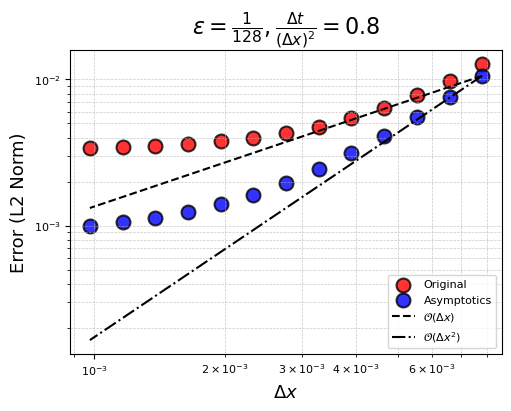

In [154]:
plt.figure(figsize=(5, 4), layout='constrained')

L2_dtC = [L2_eps128_Nx_128, L2_eps128_Nx_152, L2_eps128_Nx_181, L2_eps128_Nx_215, L2_eps128_Nx_256, L2_eps128_Nx_304, L2_eps128_Nx_362,  \
          L2_eps128_Nx_431, L2_eps128_Nx_512, L2_eps128_Nx_608, L2_eps128_Nx_724, L2_eps128_Nx_861, L2_eps128_Nx_1024]

Asym_L2_eps_128 = [Asym_L2_eps128_Nx_128, Asym_L2_eps128_Nx_152, Asym_L2_eps128_Nx_181, Asym_L2_eps128_Nx_215, Asym_L2_eps128_Nx_256, \
                   Asym_L2_eps128_Nx_304, Asym_L2_eps128_Nx_362, Asym_L2_eps128_Nx_431, Asym_L2_eps128_Nx_512, Asym_L2_eps128_Nx_608, \
                   Asym_L2_eps128_Nx_724, Asym_L2_eps128_Nx_861,Asym_L2_eps128_Nx_1024]

xvalues = np.array([(1/128), (1/152), (1/181), (1/215), (1/256), (1/304), (1/362), (1/431), (1/512), (1/608), (1/724), (1/861), (1/1024)])
plt.scatter(xvalues[:], L2_dtC[:], s=100, color='red', label = 'Original', edgecolors='black', linewidth=1.5, alpha=0.8)
plt.scatter(xvalues[:], Asym_L2_eps_128[:], s=100, color='blue', label = 'Asymptotics' , edgecolors='black', linewidth=1.5, alpha=0.8)
plt.loglog()
plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

plt.title(r'$\epsilon = \frac{1}{128}, \frac{\Delta t}{(\Delta x)^2} = 0.8 $', fontsize=16)
plt.xlabel(r'$\Delta x$', fontsize=13)
plt.ylabel('Error (L2 Norm)', fontsize = 13)

C1 = Asym_L2_eps_128[0] / xvalues[0]  # Scaling factor for ∼ ε
C2 = Asym_L2_eps_128[0] / (xvalues[0]**2)  # Scaling factor for ∼ ε²

eps_1 = C1 * xvalues    # ∼ ε reference line
eps_2 = C2 * xvalues**2  # ∼ ε² reference line

# Plot reference lines
plt.loglog(xvalues, eps_1, 'k--', label=r'$\mathcal{O}(\Delta x)$')   # First-order convergence
plt.loglog(xvalues, eps_2, 'k-.', label=r'$\mathcal{O}(\Delta x^2)$') # Second-order convergence

plt.tick_params(axis='both', which='major', labelsize=8)
plt.tick_params(axis='both', which='minor', labelsize=8)

plt.legend(fontsize=8, loc='lower right')

#plt.savefig("Asymptotic_Error_Comparison.png", format="png")
#plt.savefig("Asymptotic_Error_Comparison.pdf", format="pdf")

# Asymtotic Vary eps

In [157]:
Asym_epsdx_Nx_128 = np.load('Asymtotic_N128_epsdx.npz')['h_num']
Asym_epsdx_Nx_256 = np.load('Asymtotic_N256_epsdx.npz')['h_num']
Asym_epsdx_Nx_512 = np.load('Asymtotic_N512_epsdx.npz')['h_num']

Asym_epsdx_Nx_181 = np.load('Asymtotic_N181_epsdx.npz')['h_num']
Asym_epsdx_Nx_362 = np.load('Asymtotic_N362_epsdx.npz')['h_num']

In [159]:
Asym_L2_epsdx_Nx_128 = np.linalg.norm(h_a.flatten() - Asym_epsdx_Nx_128)
Asym_L2_epsdx_Nx_256 = np.linalg.norm(h_a.flatten() - Asym_epsdx_Nx_256)
Asym_L2_epsdx_Nx_512 = np.linalg.norm(h_a.flatten() - Asym_epsdx_Nx_512)

Asym_L2_epsdx_Nx_181 = np.linalg.norm(h_a.flatten() - Asym_epsdx_Nx_181)
Asym_L2_epsdx_Nx_362 = np.linalg.norm(h_a.flatten() - Asym_epsdx_Nx_362)

<Figure size 800x600 with 0 Axes>

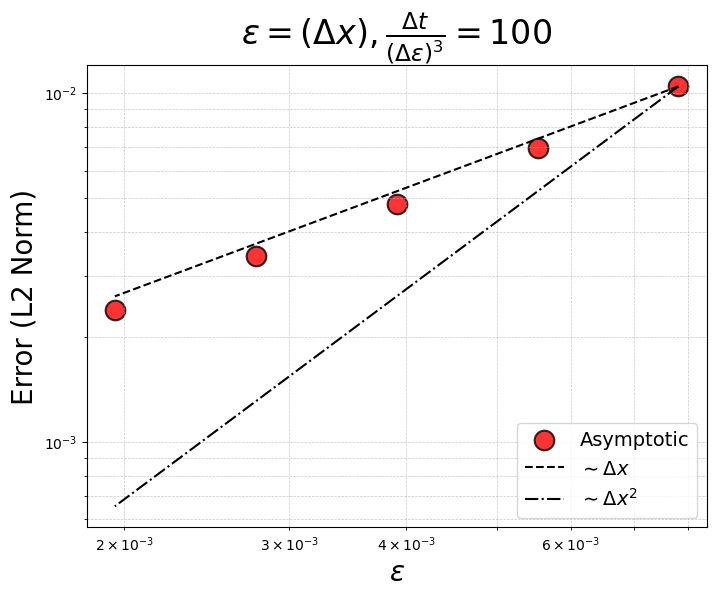

In [161]:
plt.figure(figsize=(8, 6))

Asym_L2_eps2dx = [Asym_L2_epsdx_Nx_128, Asym_L2_epsdx_Nx_181, Asym_L2_epsdx_Nx_256, Asym_L2_epsdx_Nx_362, Asym_L2_epsdx_Nx_512]

xvalues = np.array([(1/128), (1/181), (1/256), (1/362), (1/512)])
plt.figure(figsize=(8, 6))
plt.scatter(xvalues[:], Asym_L2_eps2dx[:], s=200, color='red',  label='Asymptotic', edgecolors='black', linewidth=1.5, alpha=0.8)
plt.loglog()
plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

plt.title(r'$\epsilon = (\Delta x), \frac{\Delta t}{(\Delta \epsilon)^3} = 100 $', fontsize=24)
plt.xlabel(r'$\epsilon $', fontsize=20)
plt.ylabel('Error (L2 Norm)', fontsize = 20)

C1 = Asym_L2_eps2dx[0] / xvalues[0]  # Scaling factor for ∼ ε
C2 = Asym_L2_eps2dx[0] / (xvalues[0]**2)  # Scaling factor for ∼ ε²

eps_1 = C1 * xvalues    # ∼ ε reference line
eps_2 = C2 * xvalues**2  # ∼ ε² reference line

# Plot reference lines
plt.loglog(xvalues, eps_1, 'k--', label=r'$\sim \Delta x$')   # First-order convergence
plt.loglog(xvalues, eps_2, 'k-.', label=r'$\sim \Delta x^2$') # Second-order convergence

# Add legend
plt.legend(fontsize=14, loc='lower right')


# eps = 2dx

In [164]:
Asym_eps2dx_Nx_128 = np.load('Asymtotic_N128_eps2dx.npz')['h_num']
Asym_eps2dx_Nx_256 = np.load('Asymtotic_N256_eps2dx.npz')['h_num']
Asym_eps2dx_Nx_512 = np.load('Asymtotic_N512_eps2dx.npz')['h_num']
Asym_eps2dx_Nx_1024 = np.load('Asymtotic_N1024_eps2dx.npz')['h_num']

Asym_eps2dx_Nx_152 = np.load('Asymtotic_N152_eps2dx.npz')['h_num']
Asym_eps2dx_Nx_215 = np.load('Asymtotic_N215_eps2dx.npz')['h_num']
Asym_eps2dx_Nx_304 = np.load('Asymtotic_N304_eps2dx.npz')['h_num']
Asym_eps2dx_Nx_430 = np.load('Asymtotic_N430_eps2dx.npz')['h_num']
Asym_eps2dx_Nx_608 = np.load('Asymtotic_N608_eps2dx.npz')['h_num']
Asym_eps2dx_Nx_861 = np.load('Asymtotic_N861_eps2dx.npz')['h_num']

Asym_eps2dx_Nx_181 = np.load('Asymtotic_N181_eps2dx.npz')['h_num']
Asym_eps2dx_Nx_362 = np.load('Asymtotic_N362_eps2dx.npz')['h_num']
Asym_eps2dx_Nx_724 = np.load('Asymtotic_N724_eps2dx.npz')['h_num']

In [166]:
Asym_L2_eps2dx_Nx_128 = np.linalg.norm(h_a.flatten() - Asym_eps2dx_Nx_128)
Asym_L2_eps2dx_Nx_256 = np.linalg.norm(h_a.flatten() - Asym_eps2dx_Nx_256)
Asym_L2_eps2dx_Nx_512 = np.linalg.norm(h_a.flatten() - Asym_eps2dx_Nx_512)
Asym_L2_eps2dx_Nx_1024 = np.linalg.norm(h_a.flatten() - Asym_eps2dx_Nx_1024)

Asym_L2_eps2dx_Nx_181 = np.linalg.norm(h_a.flatten() - Asym_eps2dx_Nx_181)
Asym_L2_eps2dx_Nx_362 = np.linalg.norm(h_a.flatten() - Asym_eps2dx_Nx_362)
Asym_L2_eps2dx_Nx_724 = np.linalg.norm(h_a.flatten() - Asym_eps2dx_Nx_724)

Asym_L2_eps2dx_Nx_152 = np.linalg.norm(h_a.flatten() - Asym_eps2dx_Nx_152)
Asym_L2_eps2dx_Nx_215 = np.linalg.norm(h_a.flatten() - Asym_eps2dx_Nx_215)
Asym_L2_eps2dx_Nx_304 = np.linalg.norm(h_a.flatten() - Asym_eps2dx_Nx_304)
Asym_L2_eps2dx_Nx_430 = np.linalg.norm(h_a.flatten() - Asym_eps2dx_Nx_430)
Asym_L2_eps2dx_Nx_608 = np.linalg.norm(h_a.flatten() - Asym_eps2dx_Nx_608)
Asym_L2_eps2dx_Nx_861 = np.linalg.norm(h_a.flatten() - Asym_eps2dx_Nx_861)

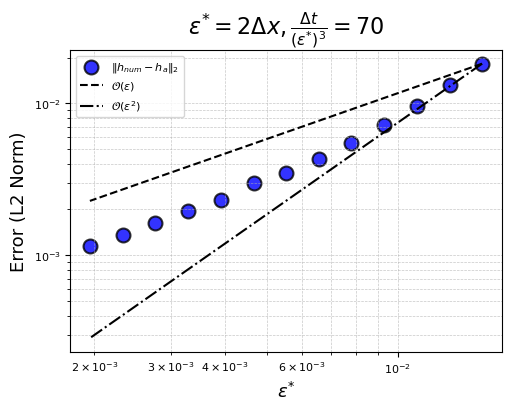

In [168]:
plt.figure(figsize=(5, 4), layout='constrained')

Asym_L2_eps2dx = [Asym_L2_eps2dx_Nx_128, Asym_L2_eps2dx_Nx_152, Asym_L2_eps2dx_Nx_181, Asym_L2_eps2dx_Nx_215, Asym_L2_eps2dx_Nx_256, \
                  Asym_L2_eps2dx_Nx_304, Asym_L2_eps2dx_Nx_362, Asym_L2_eps2dx_Nx_430, Asym_L2_eps2dx_Nx_512, Asym_L2_eps2dx_Nx_608, \
                  Asym_L2_eps2dx_Nx_724, Asym_L2_eps2dx_Nx_861, Asym_L2_eps2dx_Nx_1024]

x_values = np.array([(1/128), (1/152), (1/181), (1/215), (1/256), (1/304), (1/362), (1/430), (1/512), (1/608), (1/724), (1/861), (1/1024)])
eps_values = 2*x_values

plt.scatter(eps_values[:], Asym_L2_eps2dx[:], s=100, color='blue',  label=r'$\| h_{num} - h_{a} \|_2$', edgecolors='black', linewidth=1.5, alpha=0.8)
plt.loglog()
plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

plt.title(r'$\epsilon^{*} = 2\Delta x, \frac{\Delta t}{(\epsilon^{*})^3} = 70 $', fontsize=16)
plt.xlabel(r'$\epsilon^{*} $', fontsize=13)
plt.ylabel('Error (L2 Norm)', fontsize = 13)

C1 = Asym_L2_eps2dx[0] / eps_values[0]  # Scaling factor for ∼ ε
C2 = Asym_L2_eps2dx[0] / (eps_values[0]**2)  # Scaling factor for ∼ ε²

eps_1 = C1 * eps_values   # ∼ ε reference line
eps_2 = C2 * eps_values**2  # ∼ ε² reference line


# Plot reference lines
plt.loglog(eps_values, eps_1, 'k--', label=r'$\mathcal{O}(\epsilon)$')   # First-order convergence
plt.loglog(eps_values, eps_2, 'k-.', label=r'$\mathcal{O}(\epsilon^2$)') # Second-order convergence

# Add legend
plt.legend(fontsize=8)

plt.tick_params(axis='both', which='major', labelsize=8)
plt.tick_params(axis='both', which='minor', labelsize=8)


#plt.savefig("eps_convergence.png", format="png")
#plt.savefig("eps_convergence.pdf", format="pdf")

# Check Constant dx with varied eps

In [171]:
ConstX_eps64_Nx_512 = np.load('ConstantX_N512_eps64.npz')['h_num']
ConstX_eps128_Nx_512 = np.load('ConstantX_N512_eps128.npz')['h_num']
ConstX_eps256_Nx_512 = np.load('ConstantX_N512_eps256.npz')['h_num']
ConstX_eps512_Nx_512 = np.load('ConstantX_N512_eps512.npz')['h_num']

ConstX_eps91_Nx_512 = np.load('ConstantX_N512_eps91.npz')['h_num']
ConstX_eps181_Nx_512 = np.load('ConstantX_N512_eps181.npz')['h_num']
ConstX_eps362_Nx_512 = np.load('ConstantX_N512_eps362.npz')['h_num']

ConstX_eps76_Nx_512 = np.load('ConstantX_N512_eps76.npz')['h_num']
ConstX_eps108_Nx_512 = np.load('ConstantX_N512_eps108.npz')['h_num']
ConstX_eps152_Nx_512 = np.load('ConstantX_N512_eps152.npz')['h_num']
ConstX_eps215_Nx_512 = np.load('ConstantX_N512_eps215.npz')['h_num']
ConstX_eps304_Nx_512 = np.load('ConstantX_N512_eps304.npz')['h_num']
ConstX_eps430_Nx_512 = np.load('ConstantX_N512_eps430.npz')['h_num']

In [173]:
ConstX_L2_eps64_Nx_512 = np.linalg.norm(h_a.flatten() - ConstX_eps64_Nx_512)
ConstX_L2_eps128_Nx_512 = np.linalg.norm(h_a.flatten() - ConstX_eps128_Nx_512)
ConstX_L2_eps256_Nx_512 = np.linalg.norm(h_a.flatten() - ConstX_eps256_Nx_512)
ConstX_L2_eps512_Nx_512 = np.linalg.norm(h_a.flatten() - ConstX_eps512_Nx_512)

ConstX_L2_eps91_Nx_512 = np.linalg.norm(h_a.flatten() - ConstX_eps91_Nx_512)
ConstX_L2_eps181_Nx_512 = np.linalg.norm(h_a.flatten() - ConstX_eps181_Nx_512)
ConstX_L2_eps362_Nx_512 = np.linalg.norm(h_a.flatten() - ConstX_eps362_Nx_512)

ConstX_L2_eps76_Nx_512 = np.linalg.norm(h_a.flatten() - ConstX_eps76_Nx_512)
ConstX_L2_eps108_Nx_512 = np.linalg.norm(h_a.flatten() - ConstX_eps108_Nx_512)
ConstX_L2_eps152_Nx_512 = np.linalg.norm(h_a.flatten() - ConstX_eps152_Nx_512)
ConstX_L2_eps215_Nx_512 = np.linalg.norm(h_a.flatten() - ConstX_eps215_Nx_512)
ConstX_L2_eps304_Nx_512 = np.linalg.norm(h_a.flatten() - ConstX_eps304_Nx_512)
ConstX_L2_eps430_Nx_512 = np.linalg.norm(h_a.flatten() - ConstX_eps430_Nx_512)

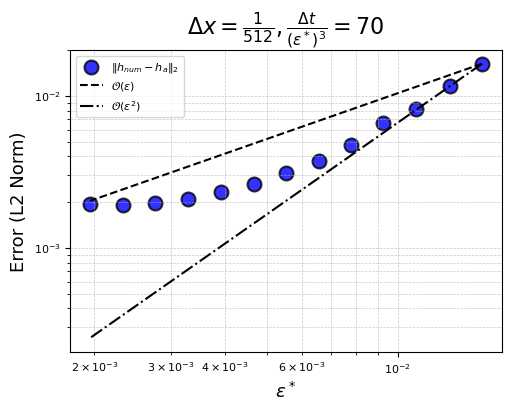

In [175]:
plt.figure(figsize=(5, 4), layout='constrained')


ConstX_L2_Nx_512 = [ConstX_L2_eps64_Nx_512, ConstX_L2_eps76_Nx_512, ConstX_L2_eps91_Nx_512, ConstX_L2_eps108_Nx_512, ConstX_L2_eps128_Nx_512, \
                    ConstX_L2_eps152_Nx_512, ConstX_L2_eps181_Nx_512, ConstX_L2_eps215_Nx_512, ConstX_L2_eps256_Nx_512, \
                    ConstX_L2_eps304_Nx_512, ConstX_L2_eps362_Nx_512, ConstX_L2_eps430_Nx_512,  ConstX_L2_eps512_Nx_512]

eps_values = np.array([(1/64), (1/76), (1/91), (1/108), (1/128), (1/152), (1/181), (1/215), (1/256), (1/304), (1/362), (1/430), (1/512)])


plt.scatter(eps_values[:], ConstX_L2_Nx_512 [:], s=100, color='blue',  label=r'$\| h_{num} - h_{a} \|_2$', edgecolors='black', linewidth=1.5, alpha=0.8)
plt.loglog()
plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

plt.title(r'$\Delta x = \frac{1}{512}, \frac{\Delta t}{(\epsilon^*)^3} = 70 $', fontsize=16)
plt.xlabel(r'$\epsilon^* $', fontsize=13)
plt.ylabel('Error (L2 Norm)', fontsize = 13)

C1 = ConstX_L2_Nx_512 [0] / eps_values[0]  # Scaling factor for ∼ ε
C2 = ConstX_L2_Nx_512 [0] / (eps_values[0]**2)  # Scaling factor for ∼ ε²

eps_1 = C1 * eps_values   # ∼ ε reference line
eps_2 = C2 * eps_values**2  # ∼ ε² reference line


# Plot reference lines
plt.loglog(eps_values, eps_1, 'k--', label=r'$\mathcal{O}(\epsilon)$')   # First-order convergence
plt.loglog(eps_values, eps_2, 'k-.', label=r'$\mathcal{O}(\epsilon^2$)') # Second-order convergence

# Add legend
plt.legend(fontsize=8)

plt.tick_params(axis='both', which='major', labelsize=8)
plt.tick_params(axis='both', which='minor', labelsize=8)

#plt.savefig("Varying_eps_convergence.pdf", format="pdf")

# Asymtotic Error Jump Graph

In [178]:
Error128 = np.abs(h_a.flatten() - dtC_eps128_Nx_128)
Error256 = np.abs(h_a.flatten() - dtC_eps128_Nx_256)
Error512 = np.abs(h_a.flatten() - dtC_eps128_Nx_512)
Error1028 = np.abs(h_a.flatten() - dtC_eps128_Nx_1024)

Asym_Error128 = np.abs(h_a.flatten() - Asym_eps128_Nx_128)
Asym_Error256 = np.abs(h_a.flatten() - Asym_eps128_Nx_256)
Asym_Error512 = np.abs(h_a.flatten() - Asym_eps128_Nx_512)
Asym_Error1024 = np.abs(h_a.flatten() - Asym_eps128_Nx_1024)

<>:16: SyntaxWarning: invalid escape sequence '\D'
<>:16: SyntaxWarning: invalid escape sequence '\D'
/var/folders/9h/nmgxk6252393vjm65h0cjxxr0000gn/T/ipykernel_77355/2269857979.py:16: SyntaxWarning: invalid escape sequence '\D'
  plt.title("Error Over Time For Different $\Delta x$ Values", fontsize=14)


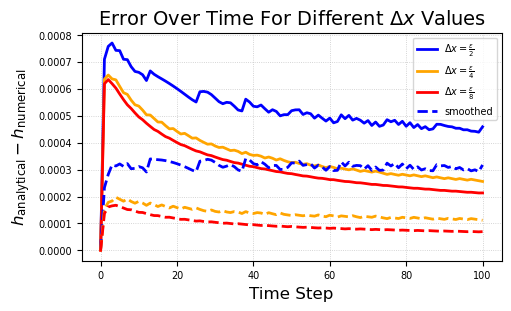

In [180]:
plt.figure(figsize=(5, 3), layout='constrained')

#plt.plot(Error128, 'b', linewidth=2, label=r'$\Delta x = \epsilon $')
plt.plot(Error256, 'blue',  linewidth=2, label=r'$\Delta x = \frac{\epsilon}{2}$')
plt.plot(Error512, 'orange', linewidth=2, label=r'$\Delta x = \frac{\epsilon}{4}$')
plt.plot(Error1028, 'red', linewidth=2, label=r'$\Delta x = \frac{\epsilon}{8}$')

#plt.plot(Asym_Error128, 'b--', linewidth=2, label=r'$\Delta x = \epsilon $')
plt.plot(Asym_Error256, 'blue', linestyle = '--', linewidth=2, label='smoothed')
plt.plot(Asym_Error512, 'orange', linestyle = '--', linewidth=2)
plt.plot(Asym_Error1024, 'red', linestyle = '--', linewidth=2)

# Labels and Title
plt.xlabel("Time Step", fontsize=12)
plt.ylabel(r"$h_{\text{analytical}} - h_{\text{numerical}}$", fontsize=12)
plt.title("Error Over Time For Different $\Delta x$ Values", fontsize=14)

# Grid and Legend
plt.grid(True, linestyle=":", linewidth=0.6, alpha=0.7)
plt.legend(fontsize=7, loc='upper right')

plt.tick_params(axis='both', which='major', labelsize=7)
plt.tick_params(axis='both', which='minor', labelsize=7)

#plt.savefig("Asmytotic_Error_Over_time.png", format="png")
#plt.savefig("Asmytotic_Error_Over_time.pdf", format="pdf")